<a href="https://colab.research.google.com/github/feras-nahhal/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Eng.Feras Hani AlNahhal


## Project Overview

## Load and Inspect Data


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno

# Save the filepath and load the data as "df_titanic"

file_path = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(file_path)

In [3]:
#Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [4]:
#1) How many rows and columns?
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 8523, Columns: 12


In [5]:
#2) What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

In [7]:
#4) Identify missing values.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
#5) Address the missing values by using a placeholder value.

# Replace missing values in 'Outlet_Size' with "Missing"
#df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")

# Replace missing values in 'Item_Weight' with the column's mean
#Item_Weight_mean = df['Item_Weight'].mean()
#df['Item_Weight'] = df['Item_Weight'].fillna(Item_Weight_mean)


In [9]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

df=df.replace('LF','Low Fat')
df=df.replace('low fat','Low Fat')
df=df.replace('reg','Regular')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [11]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
number_cols = df.select_dtypes(include=['number']).columns
for col in number_cols:
  print(f"Summary Statistics for {col}")
  print(f"The mean value{df[col].mean()}")
  print(f"The min value{df[col].min()}")
  print(f"The max value{df[col].max()}")
  # Increasing readability by adding an empty line
  print('\n')

Summary Statistics for Item_Weight
The mean value12.857645184135976
The min value4.555
The max value21.35


Summary Statistics for Item_Visibility
The mean value0.06613202877895108
The min value0.0
The max value0.328390948


Summary Statistics for Item_MRP
The mean value140.9927819781767
The min value31.29
The max value266.8884


Summary Statistics for Outlet_Establishment_Year
The mean value1997.8318667135984
The min value1985
The max value2009


Summary Statistics for Item_Outlet_Sales
The mean value2181.288913575032
The min value33.29
The max value13086.9648




<Axes: xlabel='Item_Weight', ylabel='Count'>

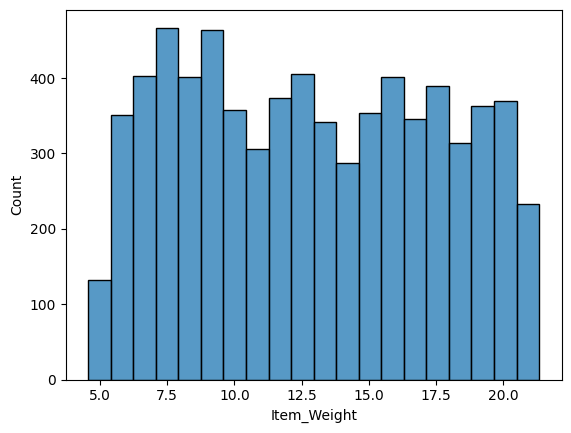

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histograms to view the distributions of numerical features in your dataset.
sns.histplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

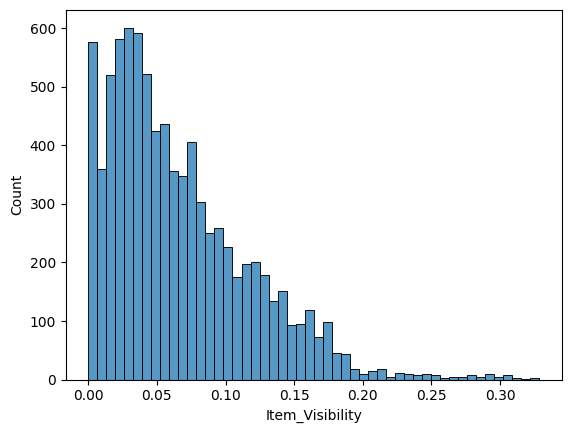

In [13]:
sns.histplot(df['Item_Visibility'])


<Axes: ylabel='Item_Weight'>

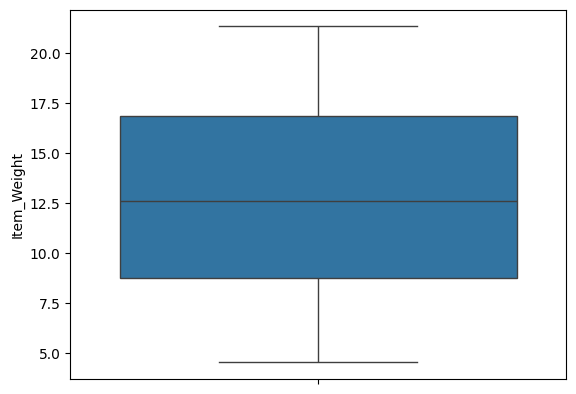

In [14]:
#Boxplots to view statistical summaries of numerical features in your dataset.
sns.boxplot(df['Item_Weight'])

<Axes: ylabel='Item_Visibility'>

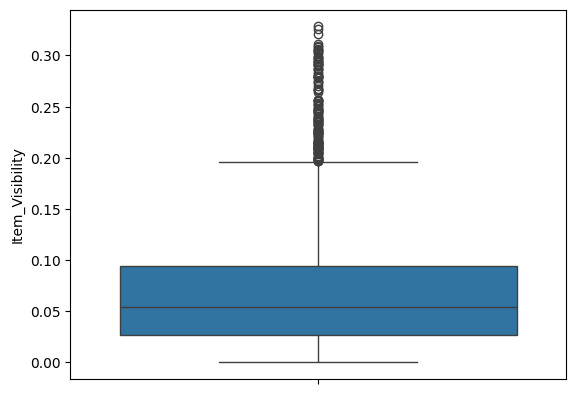

In [15]:
sns.boxplot(df['Item_Visibility'])

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

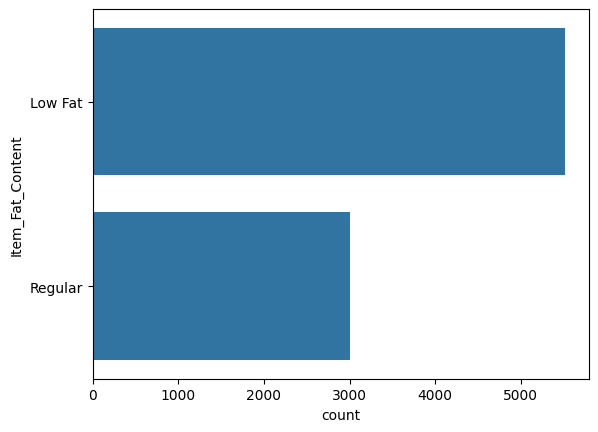

In [16]:
#Countplots to view the frequency of each class of categorial features in your dataset.
sns.countplot(df['Item_Fat_Content'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

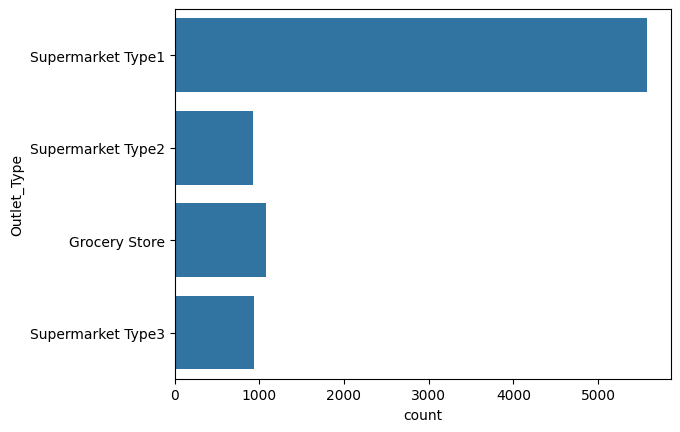

In [17]:
sns.countplot(df['Outlet_Type'])


<Axes: >

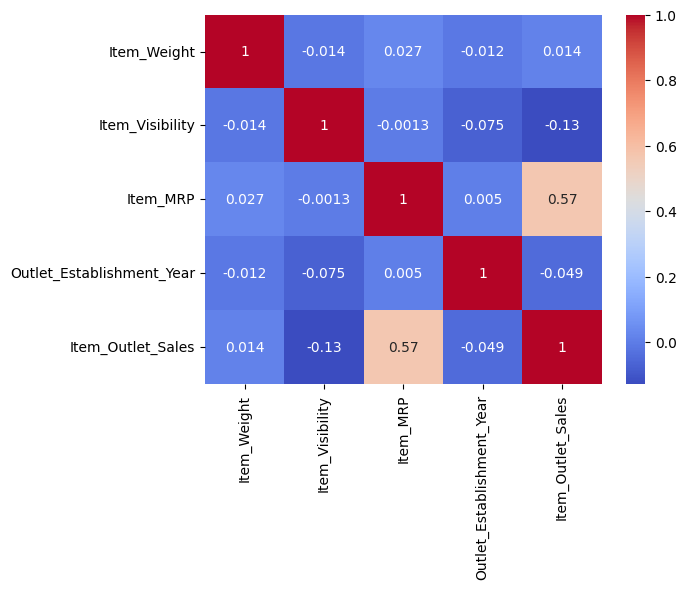

In [18]:
#Heatmap to view the correlation between features.
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')


## Exploratory Data Analysis


## Univariate EDA Functions

In [19]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## Multivariate Feature vs. Target Functions.

In [20]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Feature Inspection


- feature Item_MRP Inspection

In [21]:
# Confirming the dtype to select correct EDA function
feature = 'Item_MRP'
df[feature].dtype


dtype('float64')

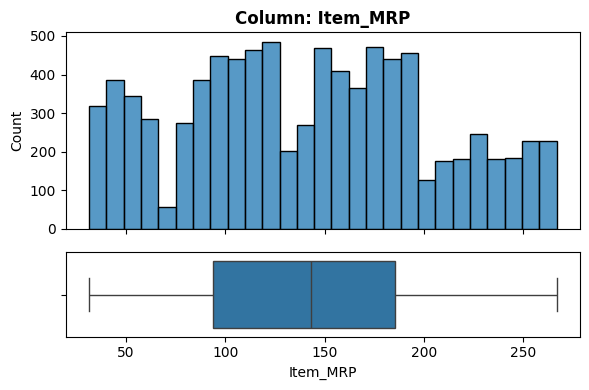

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [22]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature, figsize=(6,4))

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero null value.

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant,because the most common value 172.0422 occurs only 7 time about 0.08% from the total and it shoud be 98 or above to consder it constant or quasi-constant feature.

4. What is the cardinality? Is it high?
  - 5938, yes its  high becase its more than 10

5. Would we know this BEFORE the target is determined?
  - yes,We know the maximum retail price (MRP) of an item before the sales happen.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there’s no reason to exclude it,
  it has an strong affict on product sales

___

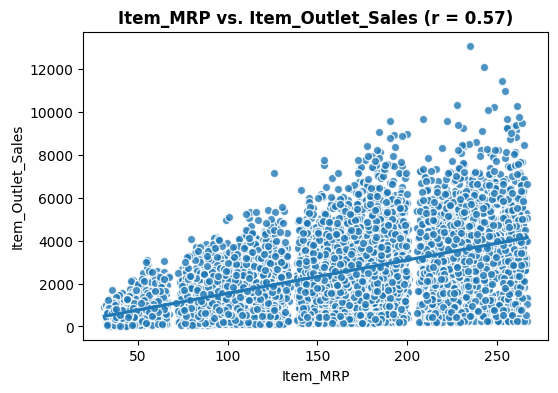

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [23]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,"Item_Outlet_Sales", figsize=(6,4))

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes,the item outer sale well increse based in item mrp .
  - Does this feature appear to be a predictor of the target?
    - yes, according to the Regression Plot we have postive corrlatian at 0.57 with the item_outer_sales increse whe the item mrp increse.

___

CRISP-DM Phase 4 - Modeling

1. Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

In [24]:
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(transform_output='pandas')

In [25]:
# Define X and y
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
# Describe only the ordinal columns from your dataset
X_train[ord_cols].value_counts()


,,,count
Outlet_Size,Outlet_Location_Type,Item_Fat_Content,
Medium,Tier 3,Low Fat,937
Small,Tier 1,Low Fat,699
Medium,Tier 3,Regular,490
Small,Tier 2,Low Fat,459
Medium,Tier 1,Low Fat,435
High,Tier 3,Low Fat,433
Small,Tier 1,Regular,380
High,Tier 3,Regular,256
Small,Tier 2,Regular,250


In [26]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [35]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Define ordinal columns
ord_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content']
print("Ordinal Columns:", ord_cols)

# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

# Define actual category orders based on value counts
size_order = ['NA', 'Small', 'Medium', 'High']
location_order = ['NA', 'Tier 1', 'Tier 2', 'Tier 3']
fat_order = ['NA', 'Low Fat', 'Regular']

# Create category list for OrdinalEncoder
ordinal_category_orders = [size_order, location_order, fat_order]

# Create OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)

# Scaler (optional, useful for linear models)
scaler_ord = StandardScaler()

# Create pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)

# Tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)


Ordinal Columns: ['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content']


In [49]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


In [50]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Item_Fat_Content']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [51]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                   'Item_Fat_Content']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [52]:

# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                   'Item_Fat_Content']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [54]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(np.mean((y_pred - y_true)**2))
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [55]:
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 735.659
- MSE = 971,595.847
- RMSE = 985.696
- R^2 = 0.672

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 967.268
- MSE = 1,701,308.821
- RMSE = 1,304.342
- R^2 = 0.383


Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- The model is overfitting , becase The training R² is much higher than the test R².

2. Your second task is to build a Random Forest model to predict sales.

- Build a default Random Forest model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).

In [56]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [57]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [58]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.484
- MSE = 185,116.209
- RMSE = 430.251
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 773.370
- MSE = 1,239,890.969
- RMSE = 1,113.504
- R^2 = 0.551


Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- the model is overfitting , becase The training R² is much higher than the test R² and becase the test dot do as well as the train due to high complex patterns .

Compare this model's performance to the linear regression model: which model has the best test scores?
- Random Forest outperforms Linear Regression on all test metrics.

3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).


In [59]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinale...
                                    ['Outlet_Size', 'Outlet_Location_Type',
           

In [69]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [10,20],
          'randomforestregressor__n_estimators':[100,150],
          'randomforestregressor__min_samples_leaf':[2,4],
          }

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimpute...
                                                                         Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [10, 20],
                         'randomforestregressor__min_samples_leaf': [2, 4],
                         'randomforestregressor__n_estimators': [100, 150]},
             verbose=1)

In [67]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 15,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 150}

In [68]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 564.965
- MSE = 665,988.105
- RMSE = 816.081
- R^2 = 0.775

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 747.095
- MSE = 1,151,782.564
- RMSE = 1,073.211
- R^2 = 0.583


CRISP-DM Phase 5 - Evaluation

4. You now have tried several different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?

I recommend using the Random Forest Regressor as the final model for predicting item outlet sales.




----------------------------------------------------------------------

- Justify your recommendation ?

The Random Forest model consistently outperforms Linear Regression across all evaluation metrics on both the training and test data.


--------------------------------------------------------------------------------

-  Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand?

Our Random Forest model can explain about 55% of the differences in sales between products and stores. That means it's doing a decent job finding the key patterns that affect sales. While it's not perfect, it gives us a fairly reliable way to predict future sales and understand what factors matter most.

-----------------------------------------------------------------------------

- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.

The RMSE
- Include why you selected this metric to explain to your stakeholder.

We used RMSE because it have big mistakes more than small ones — and in business, getting sales predictions wrong by a large amount can really hurt profits. Also, RMSE is easy to understand because it's measured in the same units as sales.



-----------------------------------------------------------------------------


 - Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

The Random Forest model shows some overfitting — it preform well on train data but in the test data not that will in the R²  However, its better in the RMSE which is the important model in these application.

 -------------------------------------------------------------------------------